In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt  = pd.read_csv("C:\\Users\\Admin\\Downloads\\pmsm_temperature_data.csv")
dt

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


In [3]:
dt.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [4]:
dt.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
dt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ambient,998070.0,-0.003905,0.993127,-8.573954,-0.599385,0.266157,0.686675,2.967117
coolant,998070.0,0.004723,1.002423,-1.429349,-1.037925,-0.177187,0.650709,2.649032
u_d,998070.0,0.004780,0.997878,-1.655373,-0.826359,0.267542,0.358491,2.274734
u_q,998070.0,-0.005690,1.002330,-1.861463,-0.927390,-0.099818,0.852625,1.793498
motor_speed,998070.0,-0.006336,1.001229,-1.371529,-0.951892,-0.140246,0.853584,2.024164
torque,998070.0,-0.003333,0.997907,-3.345953,-0.266917,-0.187246,0.547171,3.016971
i_d,998070.0,0.006043,0.998994,-3.245874,-0.756296,0.213935,1.013975,1.060937
i_q,998070.0,-0.003194,0.997912,-3.341639,-0.257269,-0.190076,0.499260,2.914185
pm,998070.0,-0.004396,0.995686,-2.631991,-0.672308,0.094367,0.680691,2.917456
stator_yoke,998070.0,0.000609,1.001049,-1.834688,-0.747265,-0.057226,0.697344,2.449158


In [7]:
dt.drop(['profile_id'], axis = 1, inplace = True)
dt

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145
...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581


In [8]:
dt["stator_yoke"].unique()

array([-1.8314217 , -1.8309687 , -1.8304    , ...,  1.0029056 ,
        0.99915737,  0.98716253])

In [9]:
dt["stator_tooth"].unique()

array([-2.0661428, -2.0648587, -2.064073 , ...,  0.8339357,  0.8305043,
        0.8280457])

In [10]:
dt["stator_winding"].unique()

array([-2.0180326 , -2.0176313 , -2.0173435 , ...,  0.49472454,
        0.492666  ,  0.48938242])

In [11]:
y = dt.iloc[:,-4]
y

0        -2.522071
1        -2.522418
2        -2.522673
3        -2.521639
4        -2.521900
            ...   
998065    0.429853
998066    0.429751
998067    0.429439
998068    0.429558
998069    0.429166
Name: pm, Length: 998070, dtype: float64

In [12]:
x = dt.iloc[:,0:12]
x

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145
...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581


In [13]:
 x = dt.drop('pm', axis=1)

In [14]:
x

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-1.830498,-2.062795,-2.018145
...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,1.018568,0.836084,0.494725
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,1.013416,0.834438,0.494279
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,1.002906,0.833936,0.492666
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.999157,0.830504,0.490581


In [15]:
eda = pd.concat([x, y],axis=1)
eda

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-1.831422,-2.066143,-2.018033,-2.522071
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-1.830969,-2.064859,-2.017631,-2.522418
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-1.830400,-2.064073,-2.017343,-2.522673
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-1.830333,-2.063137,-2.017632,-2.521639
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-1.830498,-2.062795,-2.018145,-2.521900
...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,1.018568,0.836084,0.494725,0.429853
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,1.013416,0.834438,0.494279,0.429751
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,1.002906,0.833936,0.492666,0.429439
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.999157,0.830504,0.490581,0.429558


In [16]:
eda.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,pm
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,0.000609,-0.002208,-0.003935,-0.004396
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,1.001049,0.999597,0.998343,0.995686
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-1.834688,-2.066143,-2.019973,-2.631991
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.747265,-0.761951,-0.725622,-0.672308
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,-0.057226,0.005085,0.006536,0.094367
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.697344,0.772239,0.725660,0.680691
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.449158,2.326668,2.653781,2.917456


E:\Anacoda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anacoda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anacoda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.wa

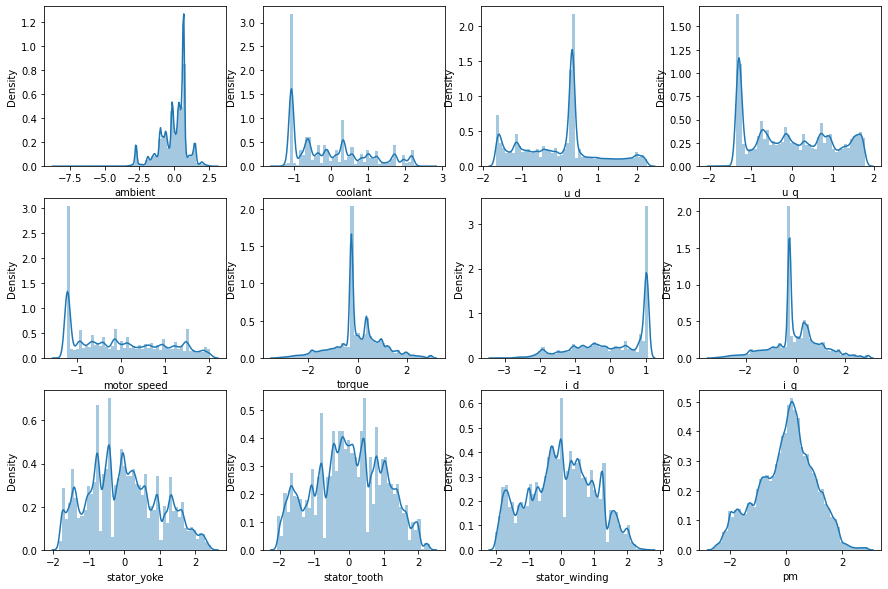

In [17]:
plt.figure(figsize = (15,10))

for i in range(len(dt.columns)):
    plt.subplot(3,4,i+1)
    sns.distplot(eda[eda.columns[i]])
plt.show()

E:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pa

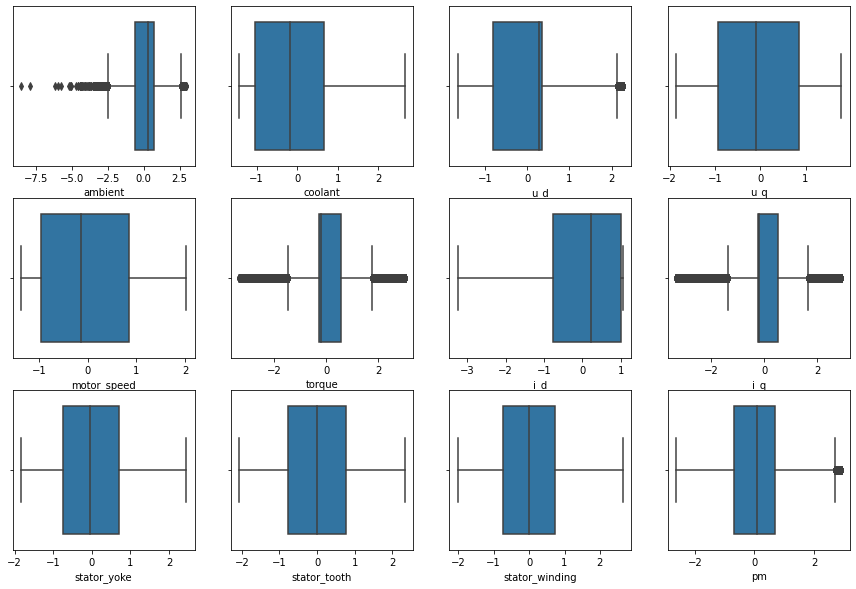

In [18]:
plt.figure(figsize = (15,10))

for i in range(len(dt.columns)):
    plt.subplot(3,4,i+1)
    sns.boxplot(eda[eda.columns[i]])
plt.show()


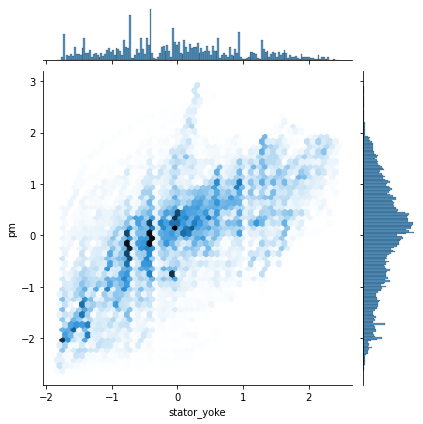

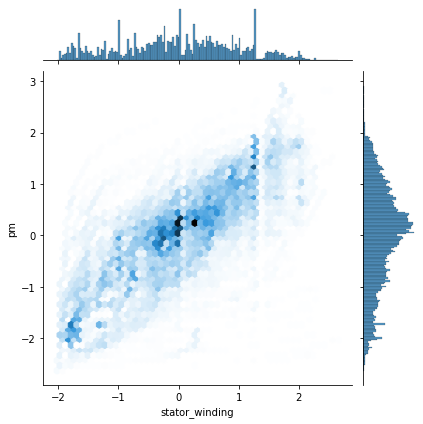

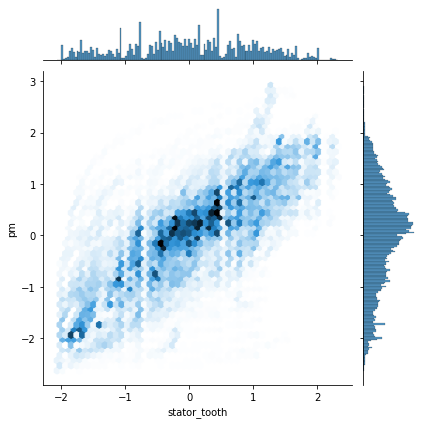

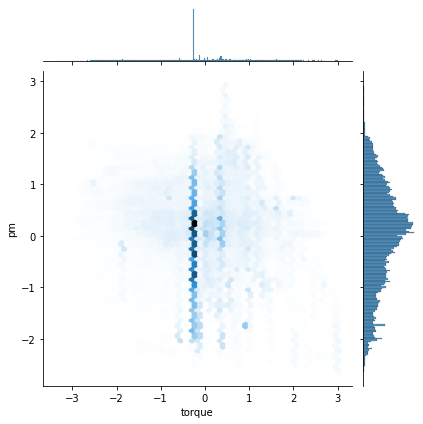

In [19]:
columns = ["stator_yoke","stator_winding","stator_tooth","torque"]
for i in columns:
    sns.jointplot(x=i, y="pm", data=eda,kind="hex");

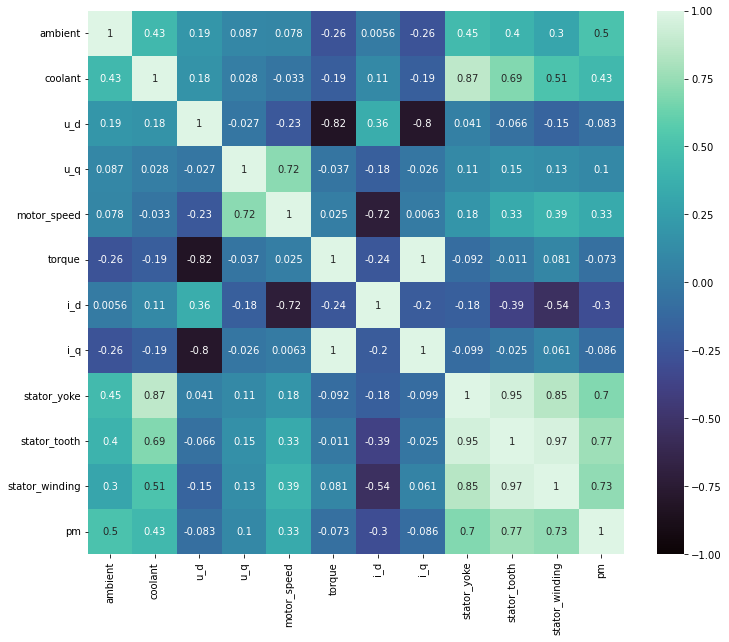

In [20]:
corr = eda.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [23]:
x_train

array([[ 0.69743727, -0.68183644, -1.65129305, ..., -0.13430964,
         0.39947848,  0.95029059],
       [-0.02593661, -0.61630139, -0.25875815, ..., -0.81131947,
        -0.90983582, -1.01228389],
       [-0.6265006 , -1.07176303,  0.2394389 , ..., -1.61423986,
        -1.77644326, -1.75917054],
       ...,
       [ 0.70118743, -0.61049479, -0.43106799, ..., -0.16452387,
         0.1439715 ,  0.33137678],
       [-0.07910976,  1.24970507, -0.82891684, ...,  0.95368731,
         0.77369153,  0.4680983 ],
       [-0.46182774,  2.19366683,  0.35538688, ...,  1.66726449,
         1.095263  ,  0.58576635]])

In [24]:
x_test

array([[-0.59582142, -0.64869085,  0.30960804, ..., -1.34285357,
        -1.60215255, -1.62146935],
       [ 0.16731312,  2.2167357 ,  0.15387034, ...,  1.74269907,
         1.35006875,  1.11046158],
       [ 0.5040572 , -0.82107097, -1.39827181, ..., -0.58044506,
        -0.41391666, -0.22705926],
       ...,
       [ 0.09352315, -1.06165652, -1.03494698, ..., -0.73701969,
        -0.43977795, -0.27760794],
       [-0.0487912 , -0.55212529, -0.46408281, ..., -0.18965371,
         0.01531923,  0.16874607],
       [-0.86044853,  0.83303605, -0.25143777, ...,  0.68346651,
         0.45230768,  0.24491794]])

In [25]:
y_train

536628    0.287970
362938   -0.186863
105287   -1.094885
828039    0.600092
41574     0.817969
            ...   
963395    0.543466
117952    1.498485
435829    0.216653
305711    0.280744
985772   -0.218149
Name: pm, Length: 798456, dtype: float64

In [26]:
y_test

612561   -1.443541
914552    0.398034
412269   -0.323778
29387    -1.475772
924310    0.893398
            ...   
914340    0.173847
394870    0.369081
24435    -0.088635
912364   -0.648421
602087    0.525439
Name: pm, Length: 199614, dtype: float64

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(798456, 11)
(199614, 11)
(798456,)
(199614,)


In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [29]:
y_pred = regressor.predict(x_test)
y_pred

array([-1.27342915,  0.16090369, -0.2496096 , ...,  0.05637514,
       -0.00889041, -0.09531231])

In [30]:
from sklearn.metrics import r2_score
acc= r2_score(y_pred,y_test)
acc

0.703078971730023

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(random_state = 0)
dtregressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [32]:
y_pred = dtregressor.predict(x_test)
y_pred

array([-1.4436866 ,  0.3966621 , -0.3152484 , ..., -0.09015407,
       -0.65117246,  0.52605975])

In [33]:
dt_score= r2_score(y_pred,y_test)
dt_score

0.997039575017566

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 11, random_state = 0)
rfregressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=11, random_state=0)

In [35]:
y_pred = rfregressor.predict(x_test)
y_pred

array([-1.44174086,  0.4571946 , -0.32239076, ..., -0.0893891 ,
       -0.64927757,  0.5254173 ])

In [36]:
rf_score= r2_score(y_pred,y_test)
rf_score

0.9987439930984762